Compare traditional and DYFI macroseismic data for the same earthquake

In [1]:
%matplotlib notebook

Import modules

In [2]:
import os
import numpy as np
import plotting.generic_mpl as generic_mpl
import eqcatalog
from prettytable import PrettyTable
from IPython.core.display import display, HTML

In [3]:
fig_folder = r"D:\Earthquake Reports\19380611\DYFI"

Select earthquake

In [4]:
## 1938 Zulzeke-Nukerke
id_earth = 509
## 2002 Alsdorf
#id_earth = 1306
[eq] = eqcatalog.rob.query_local_eq_catalog_by_id([id_earth])

Read internet macroseismic enquiries from database

In [5]:
if id_earth == 1938:
    min_fiability = 0
else:
    min_fiability = 80
dyfi = eq.get_online_macro_enquiries(min_fiability=min_fiability, verbose=False)
dyfi

<ROBDYFIEnsemble (n=1745)>

<IPython.core.display.Javascript object>


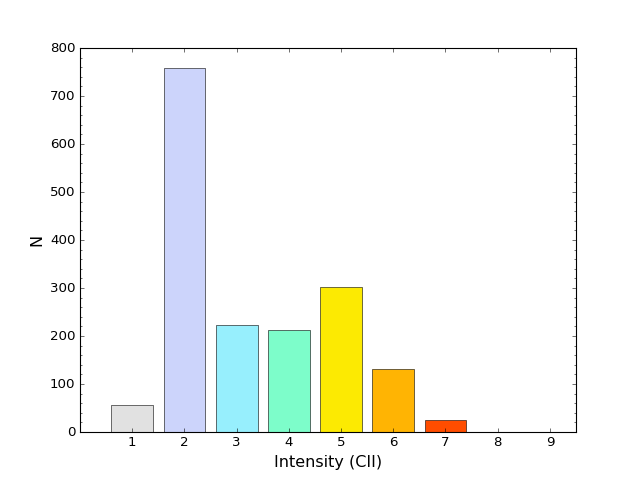

C:\Anaconda\lib\site-packages\matplotlib\axes\_axes.py:519: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [6]:
dyfi.plot_cii_histogram()

Read official macroseismic data from database

In [7]:
official_mdp_coll = eq.get_traditional_macroseismic_info()
official_mdp_coll

<MDPCollection (n=1496)>

Which intensity assessment to use for individual MDPs

In [8]:
Imin_or_max = 'mean'

Quick plot of intensity versus distance

<IPython.core.display.Javascript object>


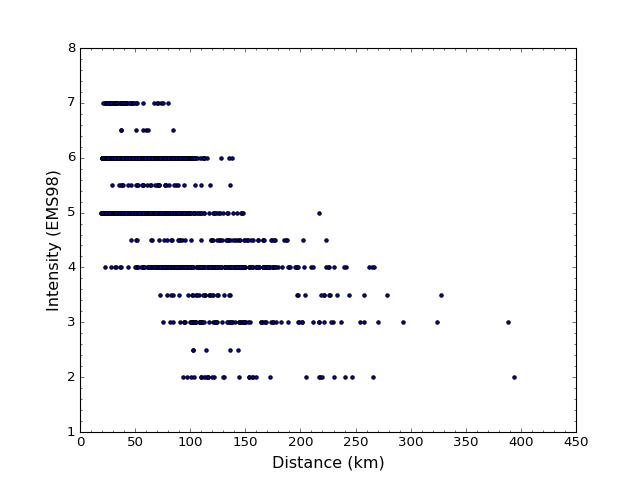

In [9]:
official_mdp_coll.plot_intensity_vs_distance(eq, Imin_or_max)

<IPython.core.display.Javascript object>


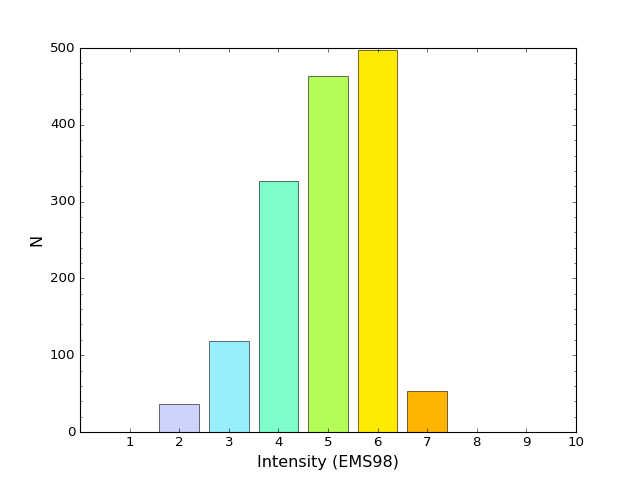

In [10]:
official_mdp_coll.plot_histogram(Imin_or_max)

Aggregate official data by commune

In [11]:
if id_earth == 509:
    commune_key = 'id_com'
    region = (2.5,6,50,51.5)
elif id_earth == 1306:
    commune_key = 'id_main'
    region = (3.0,6.5,50,51.5)

In [12]:
agg_function = 'mean'
min_num_mdp = 1
official_agg_comm = official_mdp_coll.aggregate_by_property(commune_key, Imin_or_max,
                                                            agg_function, min_num_mdp=min_num_mdp)
official_agg_comm

<AggregatedMacroInfoCollection | by id_com | n=1496 | traditional>

Found 1496 aggregates (1496 replies) for event 509:
Number of layers: 1
Fixing older MapInfo implementation of Lambert1972...
Number of features in layer 0: 2587


<IPython.core.display.Javascript object>


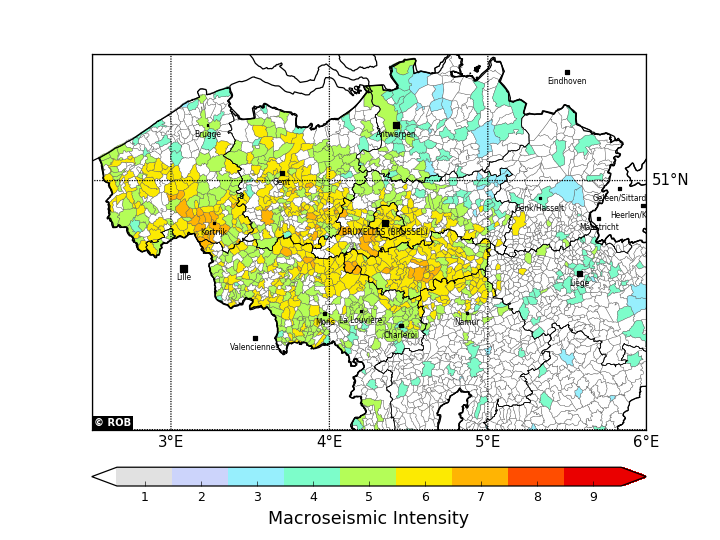

Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [14]:
fig_filespec = None
#fig_filespec = os.path.join(fig_folder, '%d_map_Ioff_%s.PNG' % (eq.year, commune_key))
official_agg_comm.plot_map(cmap='usgs', region=region, event_style=None,
                           fig_filespec=fig_filespec)

Aggregate DYFI data by commune, the ROB way

In [15]:
agg_method = 'mean'
remove_outliers = (0,100)
dyfi_agg_comm = dyfi.aggregate_by_commune(commune_key, agg_method=agg_method,
                                          remove_outliers=remove_outliers)
dyfi_agg_comm

Fixed 0 communes by zip/name, 0 by zip only, 0 unmatched
Set location for 1745 records, removed location for 0 unmatched records
Fixed 0 felt values
Set 61 motion/reaction/stand values


<AggregatedMacroInfoCollection | by id_com | n=137 | internet>

Found 137 aggregates (1413 replies) for event 509:
Number of layers: 1
Fixing older MapInfo implementation of Lambert1972...
Number of features in layer 0: 2587


<IPython.core.display.Javascript object>


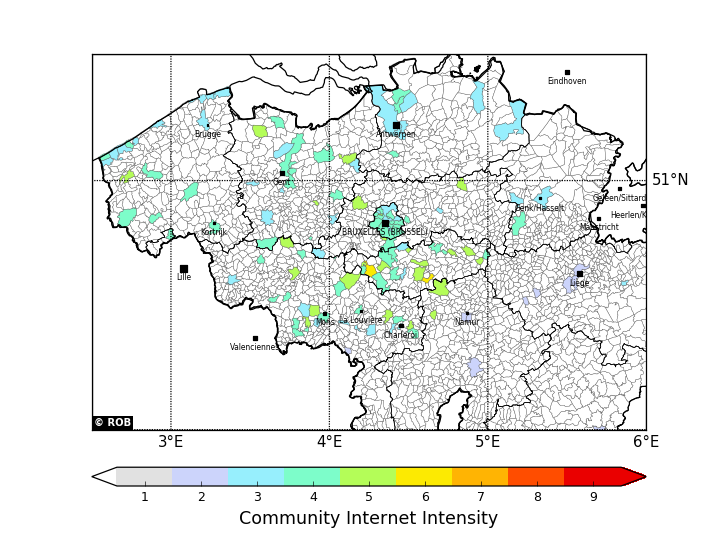

Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [16]:
fig_filespec = None
#fig_filespec = os.path.join(fig_folder, '%d_map_dyfi_%s_%s.PNG' % (eq.year, commune_key, agg_method))
dyfi_agg_comm.plot_map(cmap='usgs', region=region, event_style=None,
                       fig_filespec=fig_filespec)

Aggregate DYFI data by commune, the USGS way

In [17]:
agg_method = 'dyfi'
remove_outliers = ()
max_nan_pct = 80
dyfi_agg_comm = dyfi.aggregate_by_commune(commune_key, agg_method=agg_method,
                                          remove_outliers=remove_outliers, max_nan_pct=max_nan_pct)
dyfi_agg_comm

Fixed 0 communes by zip/name, 0 by zip only, 0 unmatched
Set location for 1745 records, removed location for 0 unmatched records
Fixed 0 felt values
Set 61 motion/reaction/stand values


<AggregatedMacroInfoCollection | by id_com | n=137 | internet>

Found 137 aggregates (1413 replies) for event 509:
Number of layers: 1
Fixing older MapInfo implementation of Lambert1972...
Number of features in layer 0: 2587


<IPython.core.display.Javascript object>


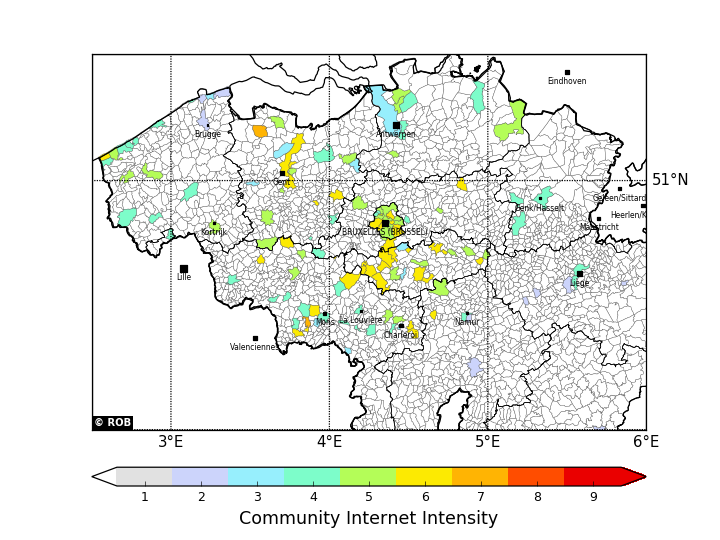

Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [18]:
fig_filespec = None
#fig_filespec = os.path.join(fig_folder, '%d_map_dyfi_%s_%s.PNG' % (eq.year, commune_key, agg_method))
dyfi_agg_comm.plot_map(cmap='usgs', region=region, event_style=None,
                      fig_filespec=fig_filespec)

Compute differences

In [19]:
dyfi_agg_comm.calc_residual_intensity(official_agg_comm)
print(dyfi_agg_comm.residuals.min(), dyfi_agg_comm.residuals.max())
rms = np.sqrt(np.mean(dyfi_agg_comm.residuals**2))
print('RMS: %.2f' % rms)

(-3.0, 1.8874080735380216)
RMS: 1.10


Found 137 aggregates (1413 replies) for event 509:
Number of layers: 1
Fixing older MapInfo implementation of Lambert1972...
Number of features in layer 0: 2587


<IPython.core.display.Javascript object>


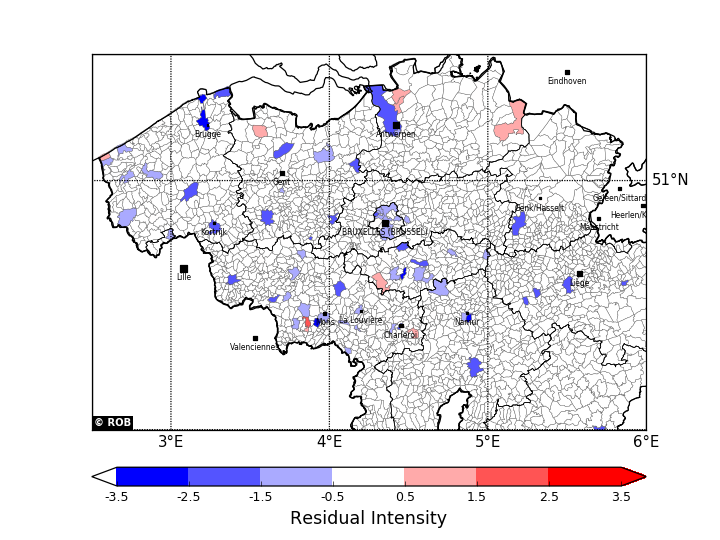

E:\Home\_kris\Python\seismo\mapping\layeredbasemap\styles\thematic.py:448: RuntimeWarning: invalid value encountered in greater
  for idx in np.where(values < self.values[0])[0]:
E:\Home\_kris\Python\seismo\mapping\layeredbasemap\styles\thematic.py:451: RuntimeWarning: invalid value encountered in less
  for idx in np.where(values > self.values[-1])[0]:


Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 1
Skipped invalid polygon
Number of layers: 1
Number of features in layer 0: 1
Number of layers: 1
Number of features in layer 0: 11
Number of layers: 1
Number of features in layer 0: 3316


In [20]:
fig_filespec = None
#fig_filespec = os.path.join(fig_folder, '%d_map_residual_%s_%s_bc.PNG' % (eq.year, commune_key, agg_method))
dyfi_agg_comm.plot_map(plot_info='residual', cmap='RdBu', region=region, event_style=None,
                      thematic_classes=np.arange(-3.5, 4, 1), fig_filespec=fig_filespec)

Compare mean CII from database, mean CII recomputed, aggregated CII and official intensity for different communes

In [21]:
comm_official_dict = official_mdp_coll.split_by_property(commune_key)
comm_dyfi_dict = dyfi.split_by_commune(comm_key=commune_key)
communes = dyfi.get_communes_from_db(comm_key=commune_key)

In [22]:
def rms(values):
    return np.sqrt(np.mean(np.power(values, 2)))

In [35]:
col_names = ["Commune", "Num replies", "Ioff",
             "Mean CII (db)", "Mean CII", "Mean CII (db) - Mean CII",
             "Mean CII - Ioff", "Mean CII - Ioff (rounded)",
             "Agg. CII", "Agg. CII - Ioff", "Agg. CII - Ioff (rounded)",
             "Agg. CII (bc)", "Agg. CII (bc) - Ioff", "Agg. CII (bc) - Ioff (rounded)"]
table = PrettyTable(col_names)
for id_com in sorted(comm_dyfi_dict.keys()):
    comm_name = communes[id_com]["name"]
    comm_dyfi = comm_dyfi_dict[id_com]
    num_replies = comm_dyfi.num_replies
    mean_cii_db = np.mean(comm_dyfi.CII)
    cii_corr = comm_dyfi.calc_cii(aggregate=False, filter_floors=False,
                                  include_other_felt=True, include_heavy_appliance=False)
    mean_cii = np.mean(cii_corr)
    #mean_cii = np.round(mean_cii)
    delta_mean_cii = np.abs(mean_cii - mean_cii_db)
    agg_cii = comm_dyfi.calc_cii(filter_floors=False, include_other_felt=True,
                                 include_heavy_appliance=False,
                                 remove_outliers=(), max_nan_pct=100)
    #agg_cii = np.round(agg_cii)
    agg_cii_bc = comm_dyfi.calc_cii(filter_floors=False, include_other_felt=True,
                                 include_heavy_appliance=False,
                                 remove_outliers=(), max_nan_pct=80)
    #agg_cii_bc = np.round(agg_cii_bc)
    Ioff = comm_official_dict[id_com][0].Imean if id_com in comm_official_dict else None
    if Ioff and num_replies >= 3:
        table.add_row([comm_name, num_replies, Ioff,
                       mean_cii_db, mean_cii, delta_mean_cii,
                       mean_cii - Ioff, np.round(mean_cii) - np.round(Ioff),
                       agg_cii, agg_cii - Ioff, np.round(agg_cii) - np.round(Ioff),
                       agg_cii_bc, agg_cii_bc - Ioff, np.round(agg_cii_bc) - np.round(Ioff)])

delta_mean_cii_rms = rms([row[4] for row in table._rows])

num_replies = np.array([row[1] for row in table._rows])
mean_cii_residuals = np.array([row[7] for row in table._rows])
agg_cii_residuals = np.array([row[10] for row in table._rows])
agg_cii_bc_residuals = np.array([row[13] for row in table._rows])

table.add_row(['RMS', '-', '-', '-', '-', delta_mean_cii_rms, '-', rms(mean_cii_residuals),
               '-', '-', rms(agg_cii_residuals), '-', '-', rms(agg_cii_bc_residuals)])
table.sortby = "Num replies"
table.reversesort = True
#table.sortby = "Commune"
table.float_format = '.2'

display(HTML(table.get_html_string()))

Commune,Num replies,Ioff,Mean CII (db),Mean CII,Mean CII (db) - Mean CII,Mean CII - Ioff,Mean CII - Ioff (rounded),Agg. CII,Agg. CII - Ioff,Agg. CII - Ioff (rounded),Agg. CII (bc),Agg. CII (bc) - Ioff,Agg. CII (bc) - Ioff (rounded)
RMS,-,-,-,-,3.85,-,1.78,-,-,1.11,-,-,1.23
BRUXELLES,113,6.00,3.12,3.02,0.10,-2.98,-3.00,5.70,-0.30,0.00,4.87,-1.13,-1.00
LIEGE,86,4.00,2.66,2.47,0.19,-1.53,-2.00,5.03,1.03,1.00,3.84,-0.16,0.00
SCHAERBEEK,75,6.00,3.96,4.05,0.09,-1.95,-2.00,6.70,0.70,1.00,5.69,-0.31,0.00
UCCLE,58,6.00,3.99,3.98,0.01,-2.02,-2.00,6.75,0.75,1.00,5.44,-0.56,-1.00
GENT,51,6.00,3.85,4.05,0.19,-1.95,-2.00,6.71,0.71,1.00,5.95,-0.05,0.00
IXELLES,49,6.00,3.77,3.68,0.09,-2.32,-2.00,6.08,0.08,0.00,5.26,-0.74,-1.00
ANTWERPEN,39,5.00,2.85,2.51,0.34,-2.49,-2.00,3.99,-1.01,-1.00,2.54,-2.46,-2.00
ETTERBEEK,38,6.00,3.83,3.73,0.10,-2.27,-2.00,6.60,0.60,1.00,5.49,-0.51,-1.00
ANDERLECHT,37,6.00,3.65,3.72,0.07,-2.28,-2.00,6.77,0.77,1.00,5.56,-0.44,0.00


In [36]:
from thirdparty.recipes.ptable_to_csv import ptable_to_csv

csv_file = os.path.join(fig_folder, '%d_Ioff_DYFI_comparison.csv' % eq.year)
ptable_to_csv(table, csv_file, headers=True)

<IPython.core.display.Javascript object>


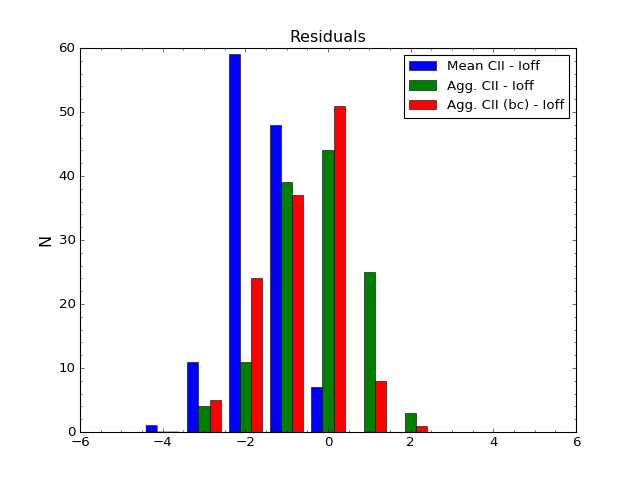

In [24]:
fig_filespec = None
#fig_filespec = os.path.join(fig_folder, '%d_dyfi_Ioff_residuals_histogram.PNG' % eq.year)
weights = None
#weights = [num_replies, num_replies, num_replies]
generic_mpl.plot_histogram([mean_cii_residuals, agg_cii_residuals, agg_cii_bc_residuals],
                           np.arange(-4.5,5), weights=weights,
                           labels=['Mean CII - Ioff', 'Agg. CII - Ioff', 'Agg. CII (bc) - Ioff'],
                           stacked=False, title='Residuals', fig_filespec=fig_filespec)

In [25]:
from scipy.stats import norm

for residuals in [mean_cii_residuals, agg_cii_residuals, agg_cii_bc_residuals]:
    data = []
    for value, num in zip(residuals, num_replies):
        data.extend([value] * num)
    mean, std = norm.fit(data)
    print(mean, std)

(-1.899928520371694, 0.6646329437053936)
(0.06719085060757685, 1.0144362054355212)
(-0.7026447462473195, 0.8754862692267854)


Compare CII for individual enquiries in a particular commune

In [52]:
comm_name = "BRUGGE"
[id_com] = [id for id in communes if communes[id]["name"] == comm_name]
comm_dyfi = comm_dyfi_dict[id_com]
CII_corr = comm_dyfi.calc_cii(aggregate=False, filter_floors=False, include_other_felt=True,
                              include_heavy_appliance=False, remove_outliers=None)
table = PrettyTable(["id_web", "CII (db)", "CII (recomputed)"])
for i in range(len(comm_dyfi)):
    id_web = comm_dyfi.recs[i]["id_web"]
    table.add_row([id_web, comm_dyfi.CII[i], CII_corr[i]])
table.add_row(["Mean", np.mean(comm_dyfi.CII), np.mean(CII_corr)])
#table.sortby = 'CII (recomputed)'
#table.reversesort = True
table.float_format = '.1'
print(table)
CII_agg = comm_dyfi.calc_cii(aggregate=True, filter_floors=False, include_other_felt=True,
                             include_heavy_appliance=False)
print("Aggregated CII: %.1f" % CII_agg)

+--------+----------+------------------+
| id_web | CII (db) | CII (recomputed) |
+--------+----------+------------------+
| 49525  |   3.1    |       3.1        |
| 49530  |   2.7    |       2.0        |
| 49535  |   2.7    |       2.0        |
| 49540  |   5.4    |       5.6        |
| 49545  |   4.2    |       3.8        |
| 49550  |   3.1    |       2.5        |
| 49555  |   3.4    |       3.4        |
| 49560  |   3.1    |       2.5        |
| 49570  |   5.8    |       6.6        |
| 49575  |   2.0    |       2.0        |
| 49580  |   3.1    |       2.5        |
| 49585  |   3.1    |       2.5        |
| 58540  |   3.8    |       3.8        |
| 58545  |   4.3    |       3.4        |
| 58550  |   1.0    |       2.0        |
| 58555  |   2.7    |       2.0        |
| 58560  |   2.7    |       2.0        |
|  Mean  |   3.3    |       3.0        |
+--------+----------+------------------+
Aggregated CII: 3.8


Evaluate CWS calculation for ensemble

#49530: 8 != 6.6
#49535: 8 != 6.6
#49540: 18 != 18.6
#49545: 13 != 11.1
#49550: 9 != 7.6
#49560: 9 != 7.6
#49570: 20 != 25.0
#49575: 5 != 3.5999999999999996
#49580: 9 != 7.6
#49585: 9 != 7.6
#58545: 13 != 9.8
#58550: 0 != 1.7999999999999998
#58555: 8 != 6.6
#58560: 8 != 6.6


<IPython.core.display.Javascript object>


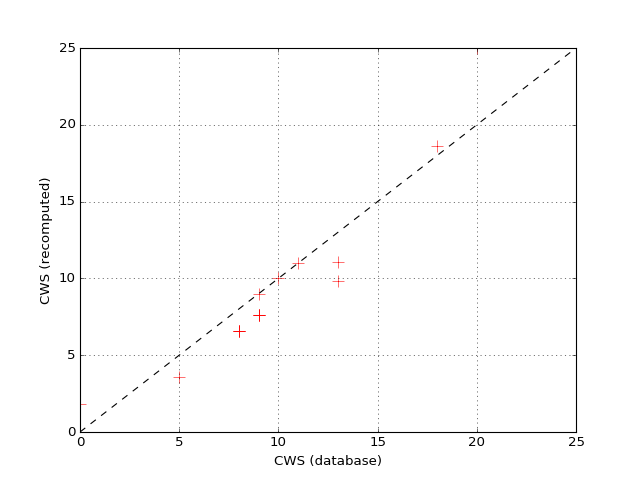

<ROBDYFIEnsemble (n=14)>

In [54]:
comm_dyfi.plot_analysis_comparison(prop='CWS', include_other_felt=True)

In [57]:
comm_dyfi.evaluate_cws_calculation(aggregate=True, filter_floors=False,
                                   remove_outliers=None, max_nan_pct=100)

felt:
  Values: [1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 1.0 0.0 1.0 1.0]
  Felt index (without other_felt) [x5]: 4.705882352941177
other_felt:
  Values: [3.0 0.0 0.0 0.0 0.0 0.0 3.0 0.0 3.0 0.0 0.0 0.0 3.0 1.0 2.0 2.0 0.0]
  Felt index (incl. other_felt) [x5]: 3.7176470588235295
motion:
  Values: [4.0 3.0 3.0 5.0 5.0 4.0 5.0 4.0 5.0 0.0 4.0 4.0 3.0 4.0 0.0 3.0 3.0]
  Motion index [x1]: 3.4705882352941178
reaction:
  Values: [-- -- -- -- -- -- -- -- -- -- -- -- 3.0 4.0 0.0 -- --]
  Reaction index [x1]: 2.3333333333333335
stand:
  Values: [-- -- -- -- -- -- -- -- -- -- -- -- -- -- 0.0 -- --]
  Stand index [x2]: 0.0
shelf:
  Values: [-- -- -- -- -- -- -- -- -- -- -- -- 1.0 -- -- 2.0 2.0]
  Shelf index [x5]: --
picture:
  Values: [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
  Picture index [x2]: --
furniture:
  Values: [-- -- -- -- -- -- -- -- -- -- -- -- -- -- -- -- --]
  Furniture index [x3]: --
  Furniture index (incl. heavy_appliance) [x3]: --
damage:
  Values:
	* 

In [58]:
comm_dyfi.print_form()

Were you asleep during the earthquake ?
  [ 0] No
  [ 1] No
  [ 2] No
  [ 3] No
  [ 4] No
  [ 5] No
  [ 6] No
  [ 7] No
  [ 8] No
  [ 9] No
  [10] No
  [11] No
  [12] No
  [13] No
  [14] No
  [15] No
  [16] No
<b>Did you feel the earthquake ?</b> (If you were asleep, did the earthquake wake you up?)
  [ 0] Yes
  [ 1] Yes
  [ 2] Yes
  [ 3] Yes
  [ 4] Yes
  [ 5] Yes
  [ 6] Yes
  [ 7] Yes
  [ 8] Yes
  [ 9] Yes
  [10] Yes
  [11] Yes
  [12] Yes
  [13] Yes
  [14] No
  [15] Yes
  [16] Yes
Did others nearby feel the earthquake ?
  [ 0] Most others felt it, but some did not
  [ 1] No answer / Don't know / Nobody else nearby
  [ 2] No answer / Don't know / Nobody else nearby
  [ 3] No answer / Don't know / Nobody else nearby
  [ 4] No answer / Don't know / Nobody else nearby
  [ 5] No answer / Don't know / Nobody else nearby
  [ 6] Most others felt it, but some did not
  [ 7] No answer / Don't know / Nobody else nearby
  [ 8] Most others felt it, but some did not
  [ 9] No answer / Don't know / 

Evaluate calculation of CWS for individual enquiries

In [24]:
#id_web = 46055
#id_web = 46075
#id_web = 46985
id_web =  58230
enquiry = dyfi.subselect_by_property('id_web', [id_web])
enquiry.evaluate_cws_calculation(include_other_felt=False, filter_floors=False)

felt:
  Values: [1.0]
  Felt index (without other_felt) [x5]: [5.0]
other_felt:
  Values: [3.0]
  Felt index (incl. other_felt) [x5]: [5.0]
motion:
  Values: [4.0]
  Motion index [x1]: [4.]
reaction:
  Values: [2.0]
  Reaction index [x1]: [2.]
stand:
  Values: [--]
  Stand index [x2]: [0.]
shelf:
  Values: [--]
  Shelf index [x5]: [0.]
picture:
  Values: [--]
  Picture index [x2]: [0.]
furniture:
  Values: [1.0]
  Furniture index [x3]: [3.]
  Furniture index (incl. heavy_appliance) [x3]: [3.]
damage:
  Values:
	- - - * - - - - * - * - - -
  Damage index [x5]: [15.]
CWS:
  Database: [24]
  Recomputed: [29.]
  Aggregated: 29.00
